# ML Lab Project On Satellite Image Classification using PCA

In [1]:
import os
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA
import matplotlib.pyplot as pt

# Function to load images from a folder

In [2]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

# Function to preprocess images 

In [3]:
def preprocess_images(images):
    preprocessed_images = [img.convert('L').resize((100, 100)) for img in images]
    return preprocessed_images

# Function to flatten images

In [4]:
def flatten_images(images):
    flattened_images = [np.array(img).flatten() for img in images]
    return flattened_images

# Load images from different folders

In [5]:
folder_paths = ['Satellite_Image_Classification\\data\\cloudy','Satellite_Image_Classification\\data\\green_area','Satellite_Image_Classification\\data\\water', 'Satellite_Image_Classification\\data\\desert']
all_images = []
for folder_path in folder_paths:
    images = load_images_from_folder(folder_path)
    preprocessed_images = preprocess_images(images)
    all_images.extend(preprocessed_images)

# Flatten and stack image data

In [6]:
stacked_images = np.stack(flatten_images(all_images))
len(stacked_images[0])

10000

# Perform PCA

In [7]:
pca = PCA(n_components=30)  # Specify number of principal components
pca.fit(stacked_images)

PCA(n_components=30)

# Transform data into principal component space

In [8]:
transformed_data = pca.transform(stacked_images)
df = pd.DataFrame(transformed_data)
df['res'] = df.index // 1500
df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,res
0,9492.317530,408.875297,772.081847,458.599106,-64.061975,214.885289,-55.686692,-7.952395,301.210471,-118.385835,...,-135.335377,96.842324,48.516410,101.053092,246.074090,178.586762,-0.175751,346.886671,102.379273,0
1,6254.627669,-25.255734,156.539224,-69.703338,39.056392,-3.617502,19.329989,-9.650560,19.284373,-24.105849,...,-8.169276,-6.110412,15.857966,2.952965,14.210804,8.224349,-8.240990,-16.900882,5.137388,0
2,5449.681685,-192.715555,204.140305,-169.854058,18.752504,-94.230252,-86.979246,36.207700,52.887687,66.797281,...,34.308383,-16.834826,12.991210,5.930296,50.448028,-22.994823,-25.716451,-16.251901,-7.183634,0
3,4439.764848,-250.370130,-111.742506,-52.156928,40.055920,-37.867520,-11.314254,35.197195,34.852511,5.516121,...,-19.866021,-17.178101,-14.457315,2.476085,1.506649,8.472664,-11.380123,-10.889611,-17.018110,0
4,4098.888878,29.801748,33.496727,-41.759923,12.051806,-3.961463,-17.477611,7.546562,-1.718920,0.065738,...,-8.950993,-7.663540,6.837823,5.906466,-1.366204,-1.012083,-2.283259,-1.635865,-1.590743,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,5878.231279,44.938164,-17.272015,-46.408280,7.131778,-11.583483,3.738764,-1.038671,1.037701,-1.004028,...,0.902309,-3.471855,-0.623560,-0.922519,1.226975,-0.053582,1.638755,-1.157048,-0.671637,3
5627,5818.671901,31.963338,1.810743,-40.133123,6.654857,-12.537374,10.262308,0.363038,-2.154592,2.434410,...,3.111219,-2.589310,-0.564229,-0.479860,2.925169,-4.411875,5.574929,1.048938,-2.330719,3
5628,5839.769810,16.314064,9.250522,-44.716890,5.757504,-16.320271,-13.784576,1.890750,7.377837,8.525716,...,0.329817,-1.808445,1.846433,-3.548584,6.795371,6.006939,0.723392,2.142370,1.834034,3
5629,5925.754213,12.555687,0.226152,-43.790980,14.417053,-18.295687,3.220507,3.524218,-2.276638,-0.481842,...,-3.268925,-0.197985,-4.310042,-0.942483,0.059714,-1.956553,1.956135,2.069260,-2.785051,3


In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X, Xt, y, yt = tts(X, y, test_size = 0.2, random_state = 0, shuffle = True)

svc = SVC(C = 1000)
rf = RandomForestClassifier(random_state = 0)
knn = KNeighborsClassifier(n_neighbors = 3)

combined = VotingClassifier(estimators = [('svc', svc), ('rf', rf), ('knn', knn)], voting = 'hard')
combined.fit(X, y)
y_pred = combined.predict(Xt)

Accuracy of model on train set: 0.94
Accuracy of model on test set: 0.82


<Axes: >

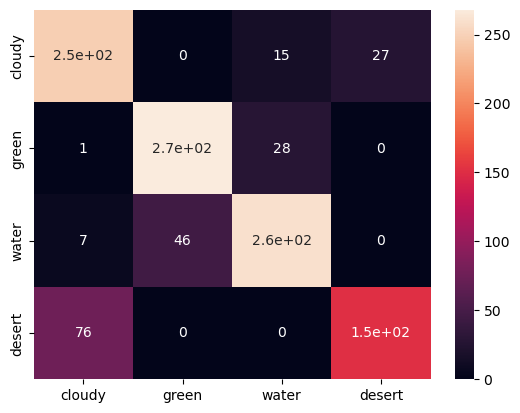

In [10]:
import sklearn.metrics as m
import seaborn as sn
print("Accuracy of model on train set:", round(m.accuracy_score(y, combined.predict(X)), 2))
print("Accuracy of model on test set:", round(m.accuracy_score(yt, y_pred), 2))
sn.heatmap(m.confusion_matrix(yt, y_pred), annot = True, 
           xticklabels = ['cloudy', 'green', 'water', 'desert'],
           yticklabels = ['cloudy', 'green', 'water', 'desert']
)

In [11]:
from sklearn.metrics import classification_report
print(classification_report(yt, y_pred), end = "\n\n")

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       290
           1       0.85      0.90      0.88       297
           2       0.86      0.83      0.84       313
           3       0.85      0.67      0.75       227

    accuracy                           0.82      1127
   macro avg       0.83      0.81      0.82      1127
weighted avg       0.83      0.82      0.82      1127


